# Data Survey  
BNP Paribasのデータを読み込みいろいろやる

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split
import xgboost as xgb

In [28]:
sns.set_style('whitegrid')
%matplotlib inline

pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_columns", 200)

In [6]:
# jupyterの幅を自動調整
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## データ読み込み・基本情報

In [56]:
d = pd.read_csv('../01.data/train.csv')

In [12]:
# 基本情報を表示
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 133 entries, ID to v131
dtypes: float64(108), int64(6), object(19)
memory usage: 116.0+ MB


In [8]:
# 行数とカラム数をカウント
rows = d.shape[0]
columns = d.shape[1]
print("The train dataset contains {0} rows and {1} columns".format(rows, columns))

The train dataset contains 114321 rows and 133 columns


In [6]:
d.describe()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v67,v68,v69,v70,v72,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,114321.000000,114321.000000,6.448900e+04,6.452500e+04,6.452500e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.570200e+04,6.447000e+04,1.142370e+05,6.448500e+04,1.142350e+05,6.448900e+04,1.143170e+05,6.448500e+04,6.442600e+04,6.452500e+04,6.448900e+04,6.447800e+04,64481.000000,113710.000000,6.364600e+04,65702.000000,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,1.142100e+05,6.448900e+04,6.569700e+04,6.447800e+04,114321.000000,6.448500e+04,1.142100e+05,6.448900e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.448900e+04,65702.000000,6.452500e+04,6.448900e+04,1.142350e+05,6.364300e+04,6.448500e+04,65702.000000,6.448900e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.448900e+04,6.452500e+04,114321.000000,65702.000000,6.452500e+04,64481.000000,6.448900e+04,64485.000000,6.442600e+04,65685.000000,114321.000000,6.448500e+04,6.452500e+04,6.448900e+04,6.442600e+04,6.447000e+04,6.569700e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.363900e+04,6.448900e+04,65658.000000,6.448900e+04,65702.000000,6.448500e+04,6.447800e+04,6.448900e+04,6.448900e+04,6.447800e+04,6.448900e+04,6.447800e+04,6.566700e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.300500e+04,6.448900e+04,6.448900e+04,65663.000000,6.452500e+04,6.569700e+04,6.569700e+04,6.448900e+04,1.142910e+05,6.442600e+04,6.448500e+04,6.569700e+04,6.447800e+04,6.364100e+04,6.448500e+04,6.448100e+04,6.447000e+04,63643.000000,6.570200e+04,6.448900e+04,6.448900e+04,6.569700e+04,114321.000000,6.447800e+04,6.442600e+04
mean,114228.928228,0.761199,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,1.883046e+00,1.544741e+01,6.881304e+00,3.798396e+00,1.209428e+01,2.080911e+00,4.923222e+00,3.832270e+00,8.410455e-01,2.223005e-01,17.773592,7.029740,1.093088e+00,1.698129,1.876031e+00,2.743454e+00,5.093328e+00,8.206416e+00,1.622151e+00,2.161633e+00,6.406236e+00,8.122387e+00,1.337560e+01,7.414708e-01,0.090928,1.237184e+00,1.046593e+01,7.182551e+00,1.292497e+01,2.216597e+00,1.079517e+01,9.142231e+00,1.630525,1.253802e+01,8.016547e+00,1.504265e+00,7.198159e+00,1.571130e+01,1.253856,1.559556e+00,4.077828e+00,7.701653e+00,1.058794e+01,1.714294e+00,1.458303e+01,1.030694,1.687327,6.343713e+00,15.847557,9.287275e+00,17.564117,9.449335e+00,12.269960,1.431767,2.433303e+00,2.405056e+00,7.307366e+00,1.333448e+01,2.209700e+00,7.287174e+00,6.208356e+00,2.173808e+00,1.607956e+00,2.822253e+00,1.220184e+00,10.180216,1.924184e+00,1.518425,9.669126e-01,5.823668e-01,5.475185e+00,3.852883e+00,6.657576e-01,6.457952e+00,7.622554e+00,7.667624e+00,1.250721e+00,1.209162e+01,6.866414e+00,2.890289e+00,5.296716e+00,2.642828e+00,1.081045,1.179136e+01,2.152620e+00,4.181284e+00,3.365314e+00,1.357445e+01,1.054805e+01,2.291218e+00,8.303857e+00,8.364651e+00,3.168970e+00,1.291218e+00,2.737596e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,0.310144,1.925763e+00,1.739389e+00
std,65934.487362,0.426353,1.082813e+00,2.961676e+00,1.148263e+00,2.036018e+00,5.999653e-01,5.894485e-01,2.783003e+00,1.930262e+00,1.393979e+00,7.900790e-01,9.244945e-01,1.175892e+00,1.443947e+00,7.329166e-01,1.791187e+00,1.911504e+00,6.162762e-01,1.713459e-01,1.155002,1.072271,4.003695e+00,2.956854,5.511957e-01,8.343556e-01,2.677940e+00,1.285432e+00,5.635237e-01,9.848598e-01,2.025179e+00,1.339802e+00,2.355631e+00,5.413723e-01,0.583478,2.358155e+00,3.169183e+00,1.004472e+00,9.969760e-01,6.479912e-01,2.110887e+00,2.064508e+00,2.895831,2.196164e+00,9.026805e-01,1.168329e+00,2.510385e+00,7.993680e-01,2.

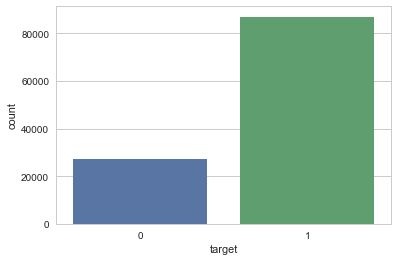

In [9]:
# most of the claims were suitable for an accelerated approval
sns.countplot(x="target", data=d)

# Null可視化

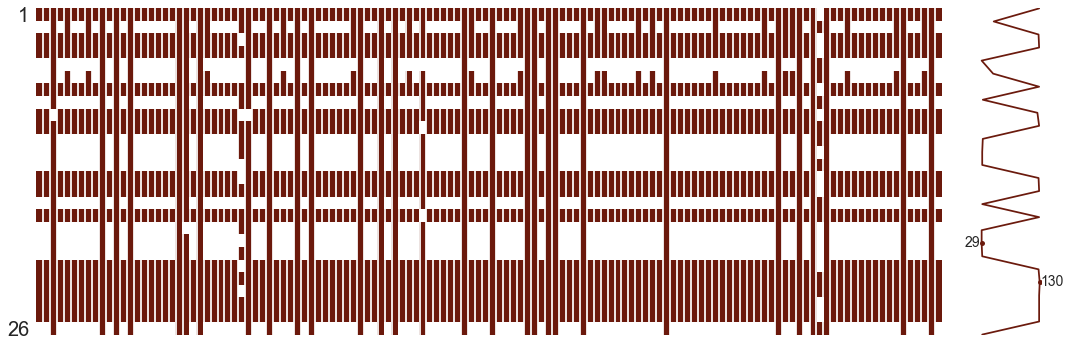

In [7]:
msno.matrix(df=d.iloc[0:26,2:132], 
            figsize=(18, 6), 
            color=(0.42, 0.1, 0.05))

# 変数間の相関を可視化

In [10]:
# 目的変数と数字型の変数を指定
numerical_columns = ['target',	'v1',	'v2',	'v4',	'v5',	'v6',	'v7',	'v8',	'v9',	'v10',	'v11',	'v12',	'v13',	'v14',	'v15',	'v16',	'v17',
           'v18',	'v19',	'v20',	'v21',	'v23',	'v25',	'v26',	'v27',	'v28',	'v29',	'v32',	'v33',	'v34',	'v35',	'v36',	'v37',	'v38',	'v39',
           'v40',	'v41',	'v42',	'v43',	'v44',	'v45',	'v46',	'v48',	'v49',	'v50',	'v51',	'v53',	'v54',	'v55',	'v57',	'v58',	'v59',	'v60',	
           'v61',	'v62',	'v63',	'v64',	'v65',	'v67',	'v68',	'v69',	'v70',	'v72',	'v73',	'v76',	'v77',	'v78',	'v80',	'v81',	'v82',	'v83',	
           'v84',	'v85',	'v86',	'v87',	'v88',	'v89',	'v90',	'v92',	'v93',	'v94',	'v95',	'v96',	'v97',	'v98',	'v99',	'v100',	'v101',	'v102',	
           'v103',	'v104',	'v105',	'v106',	'v108',	'v109',	'v111',	'v114',	'v115',	'v116',	'v117',	'v118',	'v119',	'v120',	'v121',	'v122',	
           'v123',	'v124',	'v126',	'v127',	'v128',	'v129',	'v130',	'v131']
categorical_colums = ['v3','v22','v24','v30','v31','v47','v52','v56','v66','v71','v74','v75','v79','v107','v110','v112','v113','v125']
target_column      = 'target'

In [11]:
sns.set(style="white")
# Compute the correlation matrix
corr = d[numerical_columns].corr()

/usr/local/opt/pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/seaborn/palettes.py:725: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
/usr/local/opt/pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/seaborn/palettes.py:725: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  pal = _ColorPalette(pal(np.linspace(0, 1, n_colors)))
/usr/local/opt/pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/usr/local/opt/pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


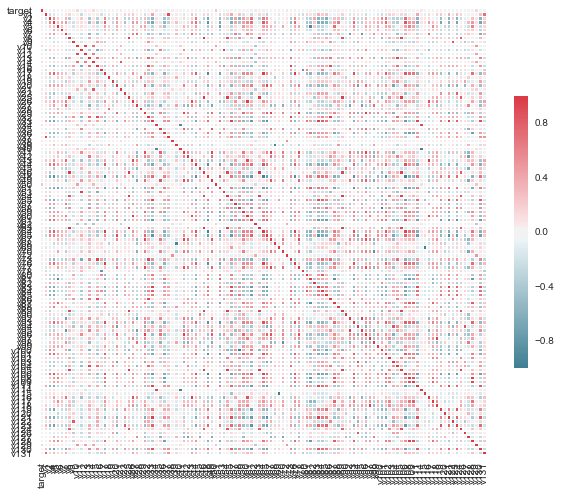

In [13]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

## XGBoost  
https://www.kaggle.com/insaff/xgboost

In [57]:
d = d.drop(['ID'], axis=1)
target = d['target']

In [58]:
#  data backup
d_before = d

In [60]:
# カテゴリ変数を数値に変換
from sklearn import preprocessing 
for f in d.columns: 
    if d[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(d[f].values)) 
        d[f] = lbl.transform(list(d[f].values))

In [63]:
d_array = np.array(d)
d_array = d_array.astype(float)

In [64]:
# Split the Learning Set
X_train, X_valid, y_train, y_valid = train_test_split(
    d_array, 
    target, 
    test_size=0.3, 
    random_state=1
)

In [65]:
xgtrain = xgb.DMatrix(X_train, y_train)

In [66]:
#  parameters setting
#n_estimators and early_stopping_rounds should be increased
clf = xgb.XGBClassifier(missing=np.nan, 
                        max_depth=7, 
                        n_estimators=300, 
                        learning_rate=0.05, 
                        subsample=1, 
                        colsample_bytree=0.9, 
                        seed=2100,
                        objective= 'binary:logistic')

In [67]:
# fitting
clf.fit(X_train, y_train, 
        early_stopping_rounds=35, 
        eval_metric="logloss", 
        eval_set=[(X_valid, y_valid)])

[0]	validation_0-logloss:0.674722
Will train until validation_0-logloss hasn't improved in 35 rounds.
[1]	validation_0-logloss:0.627755
[2]	validation_0-logloss:0.585178
[3]	validation_0-logloss:0.546408
[4]	validation_0-logloss:0.510965
[5]	validation_0-logloss:0.478453
[6]	validation_0-logloss:0.448541
[7]	validation_0-logloss:0.420946
[8]	validation_0-logloss:0.395429
[9]	validation_0-logloss:0.371782
[10]	validation_0-logloss:0.349827
[11]	validation_0-logloss:0.342597
[12]	validation_0-logloss:0.322671
[13]	validation_0-logloss:0.3041
[14]	validation_0-logloss:0.286769
[15]	validation_0-logloss:0.270573
[16]	validation_0-logloss:0.255421
[17]	validation_0-logloss:0.24123
[18]	validation_0-logloss:0.227927
[19]	validation_0-logloss:0.215443
[20]	validation_0-logloss:0.211537
[21]	validation_0-logloss:0.200046
[22]	validation_0-logloss:0.189244
[23]	validation_0-logloss:0.179082
[24]	validation_0-logloss:0.169517
[25]	validation_0-logloss:0.160507
[26]	validation_0-logloss:0.157837


[231]	validation_0-logloss:3.6e-05
[232]	validation_0-logloss:3.5e-05
[233]	validation_0-logloss:3.4e-05
[234]	validation_0-logloss:3.3e-05
[235]	validation_0-logloss:3.2e-05
[236]	validation_0-logloss:3.2e-05
[237]	validation_0-logloss:3.1e-05
[238]	validation_0-logloss:3e-05
[239]	validation_0-logloss:2.9e-05
[240]	validation_0-logloss:2.8e-05
[241]	validation_0-logloss:2.8e-05
[242]	validation_0-logloss:2.8e-05
[243]	validation_0-logloss:2.7e-05
[244]	validation_0-logloss:2.7e-05
[245]	validation_0-logloss:2.7e-05
[246]	validation_0-logloss:2.7e-05
[247]	validation_0-logloss:2.7e-05
[248]	validation_0-logloss:2.7e-05
[249]	validation_0-logloss:2.7e-05
[250]	validation_0-logloss:2.7e-05
[251]	validation_0-logloss:2.7e-05
[252]	validation_0-logloss:2.7e-05
[253]	validation_0-logloss:2.7e-05
[254]	validation_0-logloss:2.6e-05
[255]	validation_0-logloss:2.6e-05
[256]	validation_0-logloss:2.6e-05
[257]	validation_0-logloss:2.6e-05
[258]	validation_0-logloss:2.6e-05
[259]	validation_0-log

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=2100,
       silent=True, subsample=1)

In [68]:
# scores
from  sklearn.metrics import log_loss
log_train = log_loss(y_fit, clf.predict_proba(X_fit)[:,1])
log_valid = log_loss(y_eval, clf.predict_proba(X_eval)[:,1])

In [69]:
log_train, log_valid

(2.5114758712634284e-05, 2.5316195133353126e-05)

## importance

## ROC-curve

## Calibrations